<a href="https://colab.research.google.com/github/piyushjain08/THE-SPARKS-FOUNDATIONS-/blob/main/TSF_TASK02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Piyush** **Jain**

##**THE SPARKS FOUNDATION**

##**TASK 2 - Prediction using Unsupervised ML** 

### **IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **IMPORTING THE DATASET**

In [ ]:
data = pd.read_csv('/content/Iris.csv')
data.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### *CHECK THE SIZE OF DATASET*

In [ ]:
data.shape

(150, 6)

### *CHECKING FOR NULL VALUES IN DATASET*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## *SUMMARY OF DATASET*

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## **Examine Unique values in dataset**

In [ ]:
data['Species'].value_counts().to_frame()

,Species
Iris-setosa,50
Iris-virginica,50
Iris-versicolor,50


## **Removing unwanted data**

Removing the data which is of no use.

In [ ]:
df = data.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## **DATA VISUALIZATION**

### Pairplot is used for data visualization

Text(0.5, 1.02, 'Data visualization for every feature pair of the dataset')

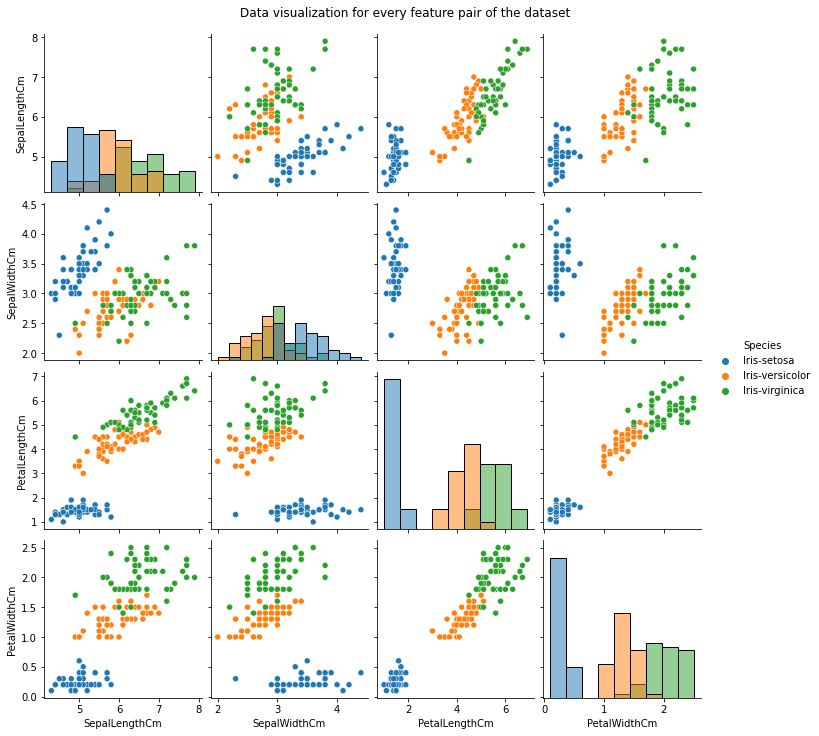

In [ ]:
visual = sns.pairplot(df, hue='Species', diag_kind='hist')
visual.fig.suptitle("Data visualization for every feature pair of the dataset", y=1.02)

## **MODEL DEVELOPMENT**
Importing KMeans class for Clustering 

In [ ]:
from sklearn.cluster import KMeans

### Creating an Array for the Model 


In [ ]:
X = df.iloc[:, [0,1,2,3]].values
X[0:5]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## Training the Kmeans model on the dataset



In [ ]:
WCSS = []     

for i in range(1,11):
    cluster_model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    cluster_model.fit(X)
    WCSS.append(cluster_model.inertia_)
    

## Finding the Optimum number of Clusters using Elbow method

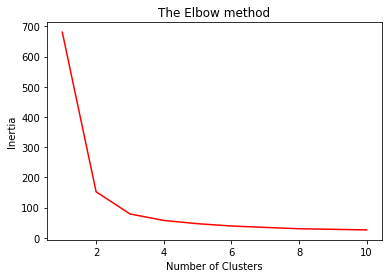

In [ ]:
plt.plot(range(1,11), WCSS, color='Red' )
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

## Clustering the Data with 3 clusters

In [ ]:
cluster_model = KMeans(n_clusters = 3, init =  'k-means++', max_iter = 300,  n_init = 10, random_state = 0)
y_clusters = cluster_model.fit_predict(X)
y_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## **Visualising the clusters**

Representing the clusters based on the "Sepal Length" and "Sepal Width".

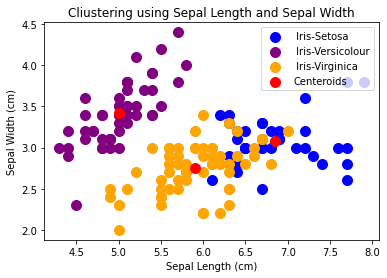

In [ ]:
plt.scatter(X[y_clusters == 0, 0], X[y_clusters == 0,1], s = 100, c= 'Blue', label = ' Iris-Setosa')
plt.scatter(X[y_clusters == 1, 0], X[y_clusters == 1,1], s = 100, c= 'Purple', label = ' Iris-Versicolour')
plt.scatter(X[y_clusters == 2, 0], X[y_clusters == 2,1], s = 100, c= 'Orange', label = ' Iris-Virginica')
plt.scatter(cluster_model.cluster_centers_[:,0], cluster_model.cluster_centers_[:,1], s= 100, c ='Red', label = 'Centeroids')
plt.title("Cliustering using Sepal Length and Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()


## Representing the clusters based on the "Petal Length" and "Petal Width".

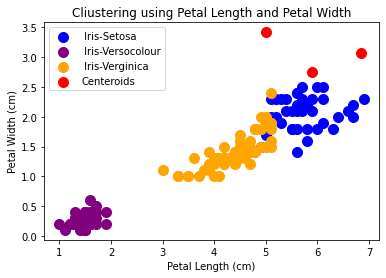

In [ ]:
plt.scatter(X[y_clusters == 0, 2], X[y_clusters == 0,3], s = 100, c= 'Blue', label = ' Iris-Setosa')
plt.scatter(X[y_clusters == 1, 2], X[y_clusters == 1,3], s = 100, c= 'Purple', label = ' Iris-Versocolour')
plt.scatter(X[y_clusters == 2, 2], X[y_clusters == 2,3], s = 100, c= 'Orange', label = ' Iris-Verginica')
plt.scatter(cluster_model.cluster_centers_[:, 0], cluster_model.cluster_centers_[:, 1], s= 100, c ='Red', label = 'Centeroids')
plt.title("Cliustering using Petal Length and Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.show()